In [73]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from copy import deepcopy

In [74]:
# W
def calcul_w(x, y, degree = 1) :
    som, w = list(), list()    
    for j in range(degree + 1) :
        for i in range(len(x)) : # or len(y)
            som.append(y[i] * (x[i] ** j))
        w.append(sum(som))
        som.clear()
    w = np.reshape(w, (len(w), 1))
    return w

In [75]:
# S
def calcul_s(x, y, degree = 1) :
    som, s_j = list(), list()
    for j in range((degree + 1) * 2) :
        for i in x :
            som.append(i ** j)
        s_j.append(sum(som))
        som.clear()
    s = np.zeros((degree + 1, degree + 1))
    for i in range(degree + 1) :
        indice = i
        for j in range(degree + 1) :
            s[i][j] = s_j[indice]
            indice += 1
    return s

In [76]:
# C = (c0, c1, c2, c3, ...)
def calcul_c(s, w) :
    return np.linalg.inv(s).dot(w).T[0]

In [77]:
# calcul de la valeur en un point du modèle
def reg_poly(c, x) :
    som = list()
    for i, j in enumerate(c) :
        som.append(j * (x ** i))
    return sum(som)

In [78]:
# fonction coût
def cost(x, y, c) :
    som = list()
    for i in range(len(x)) :
        som.append((reg_poly(c, x[i]) - y[i]) ** 2)
    return sum(som) / (2 * len(x))

In [79]:
def calcul_degree(y):
    tendance = None
    changements = 0

    for i in range(1, len(y)):
        if y[i] > y[i - 1]:
            nouvelle_tendance = "monte"
        elif y[i] < y[i - 1]:
            nouvelle_tendance = "descend"
        else:
            continue 

        if tendance and nouvelle_tendance != tendance:
            changements += 1
        tendance = nouvelle_tendance

    return changements + 1

Remplissement du dataset
[-38.         114.52380952 -32.14285714   3.33333333]


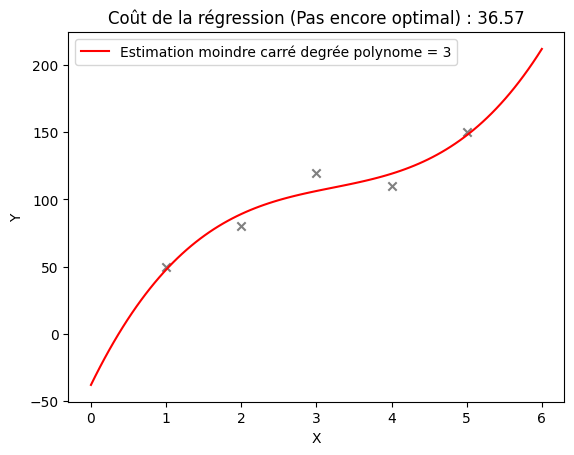

In [ ]:
# Dataset
print("Remplissement du dataset")
while True :
    x = input("Valeur du tableau x : ").split()
    x = [int(i) for i in x]
    y = input("Valeur du tableau y : ").split()
    y = [float(i) for i in y]
    if len(x) != len(y) :
        print("Les deux tableaux doivent avoir la même taille.")
        continue
    break

# Affichage du nuage et du modèle linéaire simple²
degree = calcul_degree(y)
s = calcul_s(x, y, degree)
w = calcul_w(x, y, degree)
c = calcul_c(s, w)
print(c)

x_reg, y_reg = np.linspace(min(x) - 1, max(x) + 1, 100), list()
for i in x_reg :
    y_reg.append(reg_poly(c, i))

plt.scatter(x, y, marker = "x", color = "gray")
plt.plot(x_reg, y_reg, label = f"Estimation moindre carré degrée polynome = {degree}", color = "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Coût de la régression : {cost(x, y, c):.2f}")
plt.legend()
plt.show()